#**Multi-Class Classification**

Concepts:
    
* Groupby Loop for ANOVA
    
* scaling data
    
* Model:
        
    * Logistic Regression
        
    * Naive Bayes (GaussianNB)
        
    * GridSearchCV Best hyperparameters to reduce Bias Error
    
    * Loop for detect best hyperparameters variance
    
* Advance Models:
        
     * KNN 
        
     * DecisionTree
        
     * RandomForest
        
* Ensemble Techniques:
        
     * Boosted Logistic Regression
        
     * Bagging Classifier
        
     * AdaBoost Classifier
        
     * Gradient Boost
        
* Stacking: Don't pick Morethan 5
        
     *Logistic Regression, RandomForest, and Gradient Boost

# **Machine Learning Steps**

1. Load the data

2. Explore the data, try to understand the relationship between dependent and independent variables.

3. Data Cleaning / Feature Selection:

  * Clean the data (if neccesary look for Nan values or drop NA or median imputation or KNN imputation as required)
  
  * Statistical Tests: Apply the appropriate test based on data. Levene, Two-Sample T-Test, ANOVA, Two-sample proportion test, or Chi-Square Test:
  
    **Tip**: Start by testing the signifance of the least correalated data. If that passes the p-value test that means by defaults all of others are significant. If it not, then go the least second correlated feature and test the signifance. Once a  feature passes any other variable which has higher correlation will automatically pass the test.

4. Define X_final and Y. Include all significant feature in X_final 


   * For Classification Model: Scale the data after defining X, "sc.fit_transform(X_Final)". NOT REQUIRED FOR REGRESSION

5. Start with SIMPLE Model such as (Linear Regression or Logistic Regression) by using k-fold cross validation loop

  * Rule of Thumb for K-Fold:
  
  * Data points: 300 (k-fold = 3), 400 - 500 (k-fold = 5), 1000 (k-fold = 5 -7), 5000 (k-fold = 10 - 15), as data points increase gradually increase the fold

6. Validate the linear model based on metrics: (Ex: we are k-fold 5)

  * Regression: RMSE score (Smaller the score the better the Model)
  
  * Bias Error: Average of RMSE is Bias Error. Ex: We would get 5 RMSE scores for 5-fold cv, we take average of these score and     that is the bias error.
  
  * Variance Error: Variance of RMSE scores is variance Error
  
  * Binary (1/0) Classification Model: AUC Score (Larger the score the better)
  
  * Bias Error: 1 - (Average AUC Scores). Ex: 5-fold cv we get 5 AUC scores, 1 - (average of 5 scores) = Bias Error of the mode
  
  * Variance Error: Variance of AUC Scores is variance error
  
  * Multi-Class Classification: Weighted F-1 Score (Larger the score the better the Model)
  
   * Bias Error: 1 - (Average Weighted F-1 Scores). Ex: 5-fold cv we get 5 Weighted F-1 Scores, 1 - (average of 5 scores) =         Bias Error of the model
   
   * Variance Error: Variance of Weighted F-1 Scores is variance error

7. Next, start with model which we input hyperparameters
  * GridSeachCV for find hyperparameters when you want to consider BIAS error
  
        **OR**

  * Run a loop **(RECOMMENDED)** to find the best hyperparameters, this method is recommened because GridSearchCV only takes BIAS error into account and not variance error. Ex: We are trying to figure out the best hyperparameters for KNN run a loop and print and variance to find the which combination of hyperparameters gives the least bias and variance error: 

  Hyperparameters we look for:

  * KNN: n_neighbors
  * Decision Tree: max_depth (arange(1,50, it also depends on data size), criterion  = [gini or entropy]
  * Ensemble Models: n_estimators (arange(1,50 or 100)


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine.xls')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
column_names = ['Cultivator', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium', 'Total_phenols',
                'Falvanoid', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline']

In [4]:
df = pd.read_csv('wine.xls',names = column_names)
df.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoid               178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

Cultivator is Our Target Variable which has 3 classes

In [8]:
df.corr()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoid,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoid,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


From the Correlation Matrix it seems that Ash is the Least correlated Feature with Target (Cultivator).Let's do a statistical test to determine it's significance

**Statistical Testing**

Since all the Variables are Continuous numerical variables we can do an ANOVA test

In [9]:
gb_c = df.groupby('Cultivator')

In [10]:
gb_c1 = gb_c.get_group(1)
gb_c2 = gb_c.get_group(2)
gb_c3 = gb_c.get_group(3)

In [11]:
from scipy.stats import f_oneway

In [12]:
f_oneway(gb_c1['Ash'],gb_c2['Ash'],gb_c3['Ash'])

F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)

**Tip:** Ash is the Least correlated feature with the Target. If the Least correlated feature is statistically significant that mean remaining features which have higer correlation are also statistically significant.

In [14]:
# So let's Run a For loop to check all the variables

for col in df.columns:
    p_value = f_oneway(gb_c1[col],gb_c2[col],gb_c3[col])[1]
    print(col,p_value)

Cultivator 0.0
Alcohol 3.319503795619655e-36
Malic_Acid 4.127228798041834e-14
Ash 4.149967974793239e-06
Alcalinity_of_Ash 9.444472938826817e-14
Magnesium 8.963395439251042e-06
Total_phenols 2.1376700154385954e-28
Falvanoid 3.5985858307136404e-50
Nonflavanoid_phenols 3.88804090047893e-11
Proanthocyanins 5.125358737546706e-12
Color_intensity 1.162008021927618e-33
Hue 5.9176622163620664e-30
OD280 1.393104956942896e-44
Proline 5.783168356105498e-47


All the Features are statistically significant

# **Model Building**

1. Define X,Y
2. Scale the Data
3. Build the Model
4. Interpret the Results

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop('Cultivator', axis = 1)
Y = df['Cultivator']

In [18]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [20]:
LR = LogisticRegression()
NB = GaussianNB()

In [21]:
models = []
models.append(('Logistic_Regression',LR))
models.append(('Navie_Bayes Classification',NB))

Logistic_Regression: 0.965819 (0.003505)
Navie_Bayes Classification: 0.949093 (0.000000)


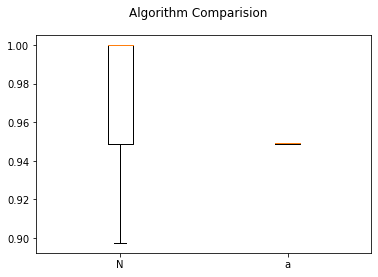

In [22]:
# Evaluate each Model in turn

results = []
names = []

for name , model in models:
    kfold = model_selection.KFold(n_splits = 3,shuffle = True,random_state = 0 )
    cv_results = model_selection.cross_val_score(model,X_std,Y,cv = kfold, scoring = 'f1_weighted') # Changed the scoring from roc_auc to f1_weighted
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))
    
    
# Boxplot Algorithm comparision

fig = plt.figure()
plt.suptitle("Algorithm Comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show()    
    

For the Two models we have ,we did 3-fold cv(because we have lessthan 200 records) and got the following results:
    
Logistic_Regression: Least Bias error by getting higher f1_weighted score but high variance error(0.0035) compared to Navie bias variance error(0.0000)
    
Naive_Bayes: High Bias error but Least variance error    

**Run Additional Models**

*KNN

*DecitionTree Classifier

   * GridSearchCV to find best Parameters 

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [24]:
X = df.drop('Cultivator', axis = 1)
Y = df['Cultivator']

In [25]:
sc = StandardScaler()
X_std = sc.fit_transform(X)  

Finding the Best Parameters for KNN:
   
To find the Optimal HyperParameter for KNN model we need to do a GridSearchCV:
    
   * n_neighbors: Rule of thumb less than 20% of data,if that exceeds that there is chance of underfitting
        
   * Weights: we want to know if uniform or distance is the best metric
        
   * we are doing 3-fold cv
    
for each combination of n_neighbor it will do 2 model: uniform and distance for 49 times so it is running about 100 models.   


In [26]:
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
Gs = GridSearchCV(estimator = knn,param_grid = params,cv = 3, scoring = 'f1_weighted')
Gs.fit(X_std,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [28]:
Gs.best_params_  # GridASearchCV suggests the best n_neighbors is 25 weights as uniform (which also happens to be the default)

{'n_neighbors': 25, 'weights': 'uniform'}

In [29]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=25,weights='uniform')

In [30]:
models = []
models.append(('Logistic_Regression',LR))
models.append(('Naive_Bayes',NB))
models.append(('KNeighbors_Classifier',KNN))

Logistic_Regression: 0.965819 (0.003505)
Naive_Bayes: 0.949093 (0.000000)
KNeighbors_Classifier: 0.960382 (0.001862)


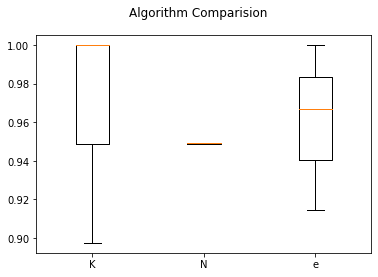

In [33]:
# Evaluate each model in turn

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits = 3,random_state = 0)
    cv_results = model_selection.cross_val_score(model, X_std, Y, cv = kfold, scoring = 'f1_weighted') # changed the scoring from roc_auc to f1_weighted
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(cv_results),np.var(cv_results , ddof = 1)))
    
# Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show()

Interpetation: Knn results are similar to Logistic Regression.Logistic Regression still has least bias error and NB still has least variance error
    

In [34]:
# Decision Tree Classifier

DT = DecisionTreeClassifier(random_state=0)
params = {'criterion':['gini','entropy']}
Gs = GridSearchCV(estimator = DT,param_grid = params,cv = 3, scoring = 'f1_weighted')
Gs.fit(X_std,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [36]:
Gs.best_params_   # Decision Tree Default is gini, but Gs is suggested for this data is entropy

{'criterion': 'entropy'}

In [37]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=25,weights='uniform')
DT = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [38]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree_Classifier',DT))

Logistic: 0.965819 (0.003505)
NaiveBayes: 0.949093 (0.000000)
KNN: 0.960382 (0.001862)
DecisionTree_Classifier: 0.949320 (0.000303)


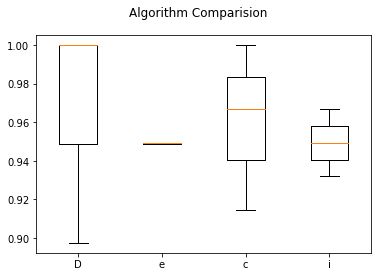

In [39]:
# Evaluate each model in turn

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
  cv_results = model_selection.cross_val_score(model, X_std, Y, cv = kfold, scoring = 'f1_weighted') #changed the scoring from roc_auc to f1_weighted
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))

  # Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show() 

Interpretation:
    
Logistic Regression has highest variance error

Logistce Regression has least bias error

Naive_Bayes has least variance error

Naive_Bayes has highest Bias error

**Random Forest:**

Don't use GridSearchCV (GS) to find the best n_estimators for Random Forest because GS best params based on mean value and not VARIENCE
Meaning GS takes bias error into account and not variance error.

GridSearchCV works great for Boosting models as we want lower bias error,so in order to combat this we need to run a loop

In [40]:
RF_Var = []

for val in np.arange(1,50):
    RF = RandomForestClassifier(criterion = 'entropy',n_estimators = val , random_state = 0)
    kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(RF,X_std,Y,cv = kfold,scoring = 'f1_weighted')
    RF_Var.append(np.var(cv_results,ddof = 1))
    print(val,np.var(cv_results,ddof = 1))

1 0.005379526662081703
2 0.0013721746986779559
3 0.0026565378431342252
4 0.005871618285031495
5 0.0013391334282265247
6 0.0011550816752257714
7 0.0012493457357640385
8 0.0011778937928185532
9 0.0006760597667154994
10 0.0011592374993573832
11 0.00010024283744237144
12 0.0006737885730662922
13 9.96116045003862e-05
14 0.000290148257553848
15 0.0006737885730662922
16 0.0011592374993573832
17 0.0011592374993573832
18 0.0011592374993573832
19 0.0011592374993573832
20 0.0011592374993573832
21 0.0011592374993573832
22 0.0011592374993573832
23 0.0011592374993573832
24 0.0011592374993573832
25 0.0011592374993573832
26 0.0011592374993573832
27 0.0011592374993573832
28 0.0011592374993573832
29 0.0011592374993573832
30 0.0011592374993573832
31 0.0018339487715807175
32 0.0011592374993573832
33 0.0011592374993573832
34 0.0011592374993573832
35 0.0011592374993573832
36 0.0011592374993573832
37 0.0011592374993573832
38 0.0011592374993573832
39 0.0006747729915345036
40 0.0011592374993573832
41 0.0011592

Least Variance error occurs when n_estimators = 11

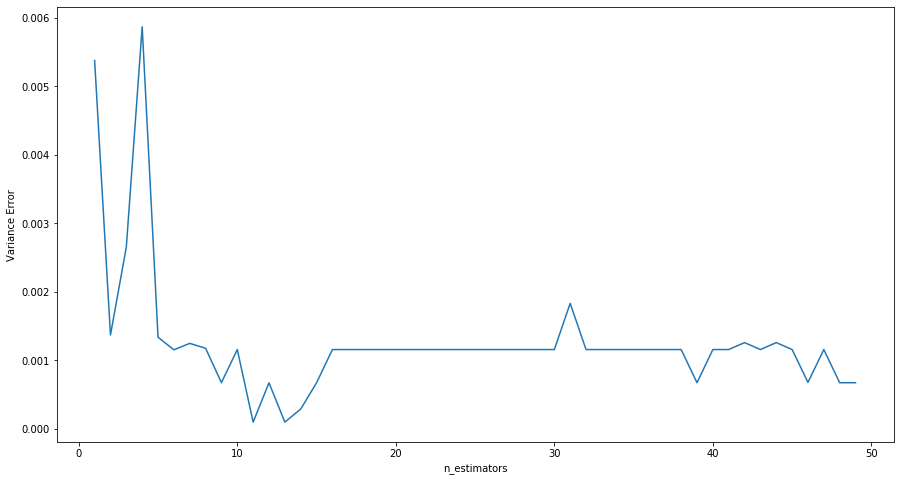

In [43]:
plt.figure(figsize = (15,8))
x_axis = np.arange(1,50)
plt.plot(x_axis,RF_Var)
plt.xlabel('n_estimators')
plt.ylabel('Variance Error')
plt.show()

The Least Variance Error occurs at global minima. in this graph we have Variance error on Y-axis and n_estimators on X-axis.The Graph Fluctuation alot we can see how the variance error is varying based on n_estimators.when n_estimator is 11 the global minima is occuring. this would be the best param to get the least variance error

Similar to the loop GridsearchCV will work when you want to reduce bias error,How ever you can apply the same loop:
    replace np.var with np.mean and get the best results.

In [44]:
#GridSeach for best params to reduce BIAS ERROR for Random Forest

# RF = RandomForestClassifier(random_state = 0)
# param = {'criterion': ['entropy','gini'], 'n_estimators' : np.arange(1,50)}
# GS = GridSearchCV(estimator = RF, param_grid = param, cv = 3, scoring = 'f1_weighted')
# GS.fit(X_std,Y)

In [45]:
#GS.best_params_

In [46]:
# This loop also gives the same results as Gridsearch CV just make sure the criterion is same as the one found in GridSearch

# RF_mean = []
# for val in np.arange(1,50):
#   RF = RandomForestClassifier(criterion = 'gini', n_estimators= val, random_state = 0)
#   kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
#   cv_results = model_selection.cross_val_score(RF, X_std, Y, cv = kfold, scoring = 'f1_weighted')
#   RF_mean.append(np.mean(cv_results))
#   print(val, np.mean(cv_results))
  

In [47]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')
DT = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
RF = RandomForestClassifier(criterion = 'entropy', n_estimators= 11, random_state= 0)

In [48]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree', DT))
models.append(('Random Forest', RF))

Logistic: 0.965819 (0.003505)
NaiveBayes: 0.949093 (0.000000)
KNN: 0.960382 (0.001862)
DecisionTree: 0.949320 (0.000303)
Random Forest: 0.960487 (0.000100)


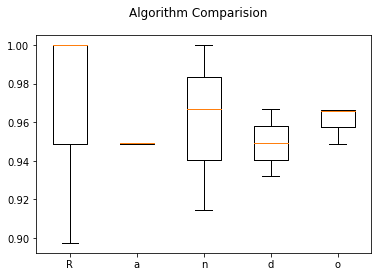

In [49]:
# Evaluate each model in turn

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
  cv_results = model_selection.cross_val_score(model, X_std, Y, cv = kfold, scoring = 'f1_weighted') #changed the scoring from roc_auc to f1_weighted
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))

  # Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show() 

**Ensemble Models**

* Bagging Classifiers
    
    * we are leaving the default Bagged model decision tree as base estimator

In [51]:
Bag_var = []
for val in np.arange(1,50): #If you go beyond 50, VE gets higher and flattens
  Bag = BaggingClassifier(n_estimators= val, random_state = 0)
  kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
  cv_results = model_selection.cross_val_score(Bag, X_std, Y, cv = kfold, scoring = 'f1_weighted')
  Bag_var.append(np.var(cv_results, ddof = 1))
  print(val, np.var(cv_results,ddof=1))
  

1 0.00042106974991778433
2 0.0006313611414897278
3 0.0007519948081686248
4 0.0007243035862334064
5 0.001394459033752932
6 0.0013012927387776208
7 0.0016568802015095858
8 0.0018922702063866046
9 0.0021095461499258247
10 0.0030840509314643627
11 0.0020920630595904883
12 0.002473046423121441
13 0.0012840460275786426
14 0.0015775546649408208
15 0.0009003107042066033
16 0.0008804186918734265
17 0.0009003107042066033
18 0.00029320294336864335
19 0.0004025221102338692
20 0.00029014710974385396
21 0.0006914707455461044
22 0.0006914707455461044
23 0.0002994262221661131
24 0.0002994262221661131
25 0.0002994262221661131
26 9.498847867549032e-05
27 9.498847867549032e-05
28 9.498847867549032e-05
29 9.498847867549032e-05
30 0.00029014710974385396
31 9.498847867549032e-05
32 9.498847867549032e-05
33 9.498847867549032e-05
34 9.70377854129041e-05
35 9.70377854129041e-05
36 0.00029014710974385396
37 0.00029014710974385396
38 0.00029014710974385396
39 0.00029014710974385396
40 0.00029014710974385396
41 0

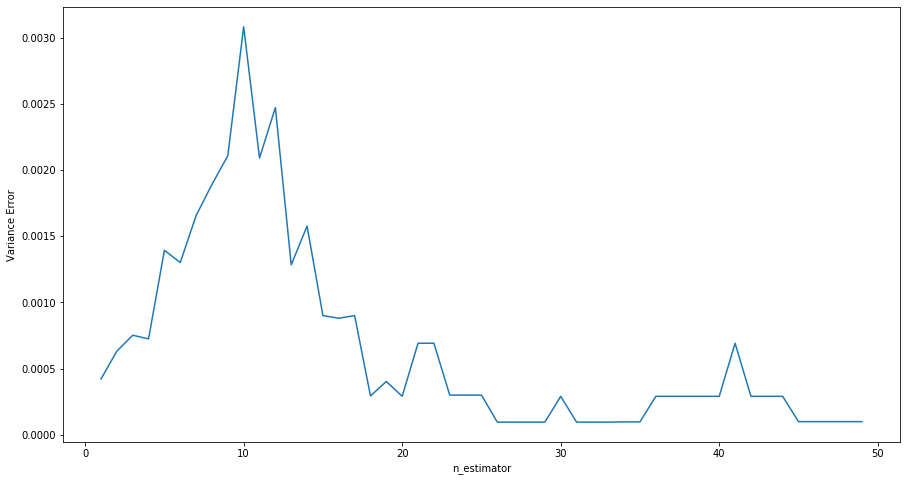

In [53]:
plt.figure(figsize = (15,8))
x_axis = np.arange(1,50)
plt.plot(x_axis, Bag_var)
plt.xlabel('n_estimator')
plt.ylabel('Variance Error')
plt.show()

In [54]:
min(Bag_var)

9.498847867549032e-05

we determined that the n_estimator 26 where global minima occurs for variance error and we will go based on that

In [55]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')
DT = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
RF = RandomForestClassifier(criterion = 'entropy', n_estimators= 11, random_state= 0)
Bag = BaggingClassifier(n_estimators= 26, random_state= 0)

In [56]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree', DT))
models.append(('Random Forest', RF))
models.append(('BaggingClassifer', Bag))

Logistic: 0.965819 (0.003505)
NaiveBayes: 0.949093 (0.000000)
KNN: 0.960382 (0.001862)
DecisionTree: 0.949320 (0.000303)
Random Forest: 0.960487 (0.000100)
BaggingClassifer: 0.955157 (0.000095)


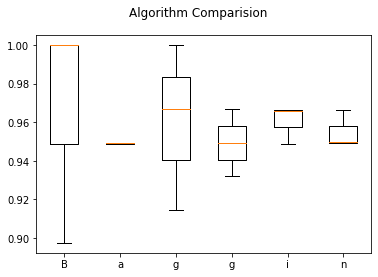

In [57]:
# Evaluate each model in turn

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
  cv_results = model_selection.cross_val_score(model, X_std, Y, cv = kfold, scoring = 'f1_weighted') #changed the scoring from roc_auc to f1_weighted
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))

  # Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show() 

Bagging: (base_estimator: decision_tree) did't really help as LogisticRegression still has the Least Bias Error and Naive_Bayes has least Variance Error

# AdaBoost Classifier and XB Boost

In [58]:
Ada_mean = []
for val in np.arange(1,100):
    AdaB = AdaBoostClassifier(n_estimators = val, random_state = 0)
    kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(AdaB,X_std,Y,cv = kfold,scoring = 'f1_weighted')
    Ada_mean.append(np.mean(cv_results))
    print(val,np.mean(cv_results))

1 0.5545388613402799
2 0.7935844073000741
3 0.9097690650291456
4 0.8563406875980976
5 0.8629583051484769
6 0.8512075403220932
7 0.8693843144972934
8 0.9041094499556209
9 0.8925814805271594
10 0.9098709080506411
11 0.8925814805271594
12 0.9041094499556209
13 0.8868493208172014
14 0.9041094499556209
15 0.8868493208172014
16 0.9041094499556209
17 0.8868493208172014
18 0.8983772902456627
19 0.8868493208172014
20 0.8983772902456627
21 0.8868493208172014
22 0.8983772902456627
23 0.8868493208172014
24 0.8983772902456627
25 0.8868493208172014
26 0.8983772902456627
27 0.8868493208172014
28 0.8983772902456627
29 0.8868493208172014
30 0.8983772902456627
31 0.8868493208172014
32 0.8983772902456627
33 0.8868493208172014
34 0.8983772902456627
35 0.8868493208172014
36 0.8983772902456627
37 0.8868493208172014
38 0.8983772902456627
39 0.8868493208172014
40 0.8983772902456627
41 0.8868493208172014
42 0.8983772902456627
43 0.8868493208172014
44 0.8983772902456627
45 0.8868493208172014
46 0.89837729024566

In [59]:
max(Ada_mean)

0.9098709080506411

**we want the Max because the least Bias Error occurs during highest f1_weighted score**

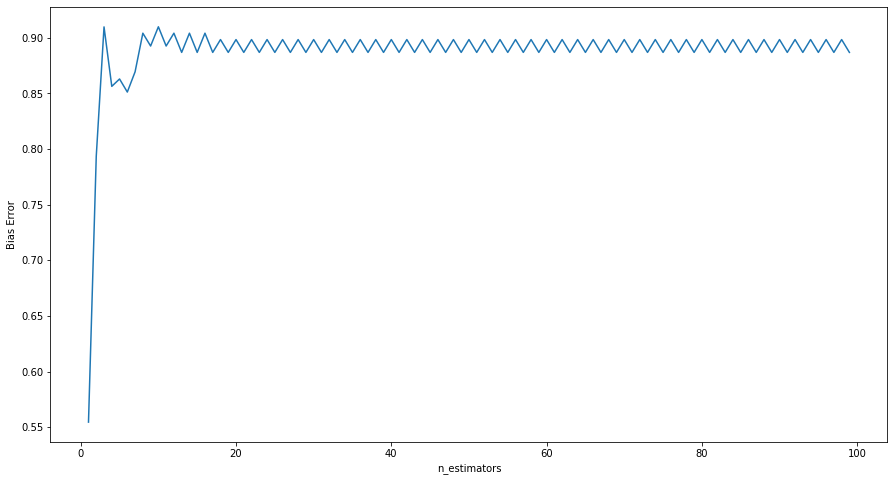

In [60]:
plt.figure(figsize = (15,8))
x_axis = np.arange(1,100)
plt.plot(x_axis,Ada_mean)
plt.xlabel('n_estimators')
plt.ylabel('Bias Error')
plt.show()

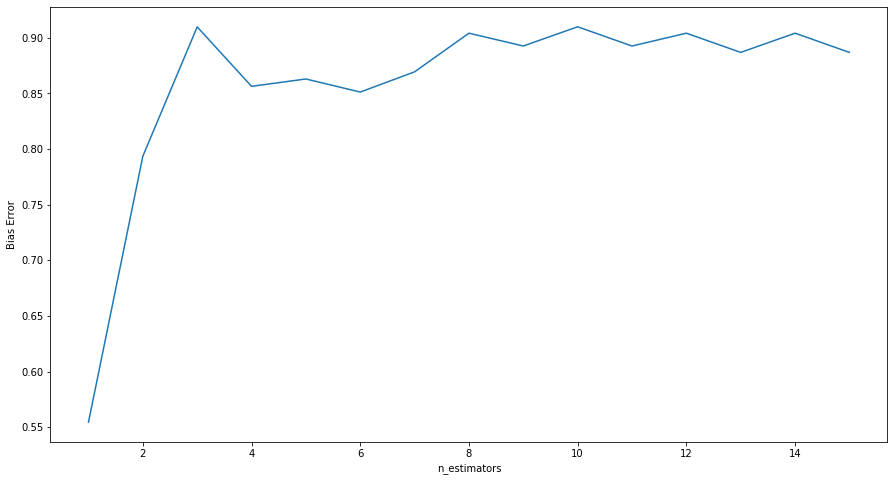

In [61]:
plt.figure(figsize = (15,8))
x_axis = np.arange(1,16)
plt.plot(x_axis,Ada_mean[:15])
plt.xlabel('n_estimators')
plt.ylabel('Bias Error')
plt.show()

In [62]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')
DT = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
RF = RandomForestClassifier(criterion = 'entropy', n_estimators= 11, random_state= 0)
Bag = BaggingClassifier(n_estimators= 26, random_state= 0)
AdaB = AdaBoostClassifier(n_estimators= 10)

In [63]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree', DT))
models.append(('Random Forest', RF))
models.append(('BaggingClassifer', Bag))
models.append(('AdaBoostClassifier', AdaB))

Logistic: 0.965819 (0.003505)
NaiveBayes: 0.949093 (0.000000)
KNN: 0.960382 (0.001862)
DecisionTree: 0.949320 (0.000303)
Random Forest: 0.960487 (0.000100)
BaggingClassifer: 0.955157 (0.000095)
AdaBoostClassifier: 0.909871 (0.000425)


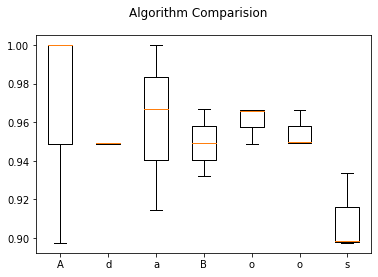

In [64]:
# Evaluate each model in turn

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
  cv_results = model_selection.cross_val_score(model, X_std, Y, cv = kfold, scoring = 'f1_weighted') #changed the scoring from roc_auc to f1_weighted
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))

  # Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show() 

In [69]:
# Try the same model with the Logistic Regression as base estimator

LR = LogisticRegression()

Ada_mean = []  # Boosted LR
for val in np.arange(1,100):
    Adab = AdaBoostClassifier(base_estimator = LR, n_estimators = val, random_state = 0)
    kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(Adab,X_std,Y, cv = kfold, scoring = 'f1_weighted')
    Ada_mean.append(np.mean(cv_results))
    print(val,np.mean(cv_results))

1 0.9772675517600966
2 0.9772675517600966
3 0.9772675517600966
4 0.9772675517600966
5 0.9772675517600966
6 0.9772675517600966
7 0.9772675517600966
8 0.9772675517600966
9 0.9772675517600966
10 0.9772675517600966
11 0.9772675517600966
12 0.9772675517600966
13 0.9772675517600966
14 0.9717206452272015
15 0.9717206452272015
16 0.9717206452272015
17 0.9717206452272015
18 0.9717206452272015
19 0.9717206452272015
20 0.966179445019816
21 0.966179445019816
22 0.966179445019816
23 0.966179445019816
24 0.966179445019816
25 0.966179445019816
26 0.966179445019816
27 0.966179445019816
28 0.966179445019816
29 0.966179445019816
30 0.9606267248867114
31 0.9606267248867114
32 0.9606267248867114
33 0.9606267248867114
34 0.9606267248867114
35 0.9606267248867114
36 0.9606267248867114
37 0.9606267248867114
38 0.9606267248867114
39 0.9606267248867114
40 0.9606267248867114
41 0.9606267248867114
42 0.9606267248867114
43 0.9606267248867114
44 0.9606267248867114
45 0.9606267248867114
46 0.9606267248867114
47 0.96

In [70]:
max(Ada_mean)

0.9772675517600966

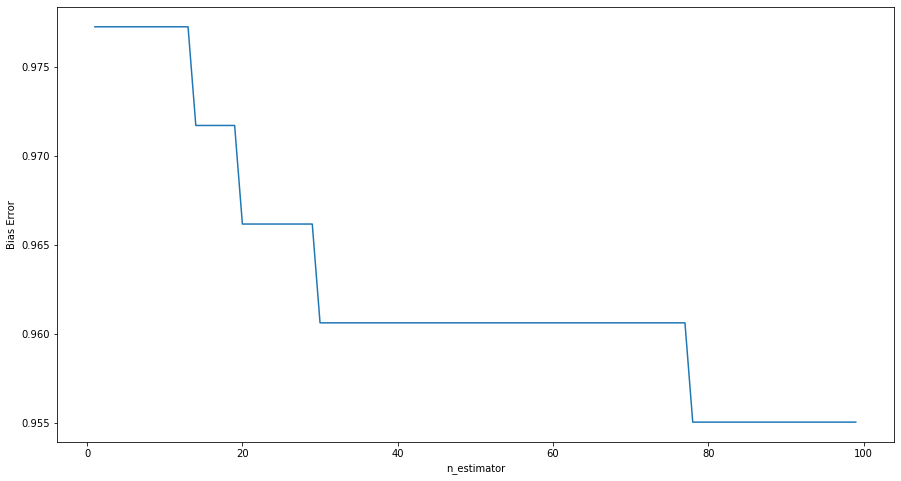

In [71]:
plt.figure(figsize = (15,8))
x_axis = np.arange(1,100)
plt.plot(x_axis,Ada_mean)
plt.xlabel('n_estimator')
plt.ylabel('Bias Error')
plt.show()

In [72]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')
DT = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
RF = RandomForestClassifier(criterion = 'entropy', n_estimators= 11, random_state= 0)
Bag = BaggingClassifier(n_estimators= 26, random_state= 0)
AdaB = AdaBoostClassifier(n_estimators= 10)
AdaB_LR = AdaBoostClassifier(base_estimator = LR, n_estimators= 5, random_state = 0)

In [73]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree', DT))
models.append(('Random Forest', RF))
models.append(('BaggingClassifer', Bag))
models.append(('AdaBoostClassifier', AdaB))
models.append(('AdaBoostLogistic', AdaB_LR))

Logistic: 0.965819 (0.003505)
NaiveBayes: 0.949093 (0.000000)
KNN: 0.960382 (0.001862)
DecisionTree: 0.949320 (0.000303)
Random Forest: 0.960487 (0.000100)
BaggingClassifer: 0.955157 (0.000095)
AdaBoostClassifier: 0.909871 (0.000425)
AdaBoostLogistic: 0.977268 (0.000681)


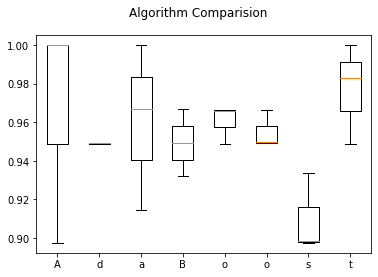

In [74]:
# Evaluate each model in turn

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
  cv_results = model_selection.cross_val_score(model, X_std, Y, cv = kfold, scoring = 'f1_weighted') #changed the scoring from roc_auc to f1_weighted
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))

  # Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show() 

Boosted Logistic Regression has yielded the best results in terms of Bias Error. Naive Bayes is still has the least Variance Error

# Gradient Boost

In [78]:
Gb_mean = []
for val in np.arange(1,150):
    GB = GradientBoostingClassifier(n_estimators = val, random_state = 0)
    kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(GB, X_std, Y, cv = kfold, scoring = 'f1_weighted')
    Gb_mean.append(np.mean(cv_results))
    print(val,np.mean(cv_results))

1 0.6668993012523824
2 0.9328177251309161
3 0.9327627497999847
4 0.9327627497999847
5 0.9327627497999847
6 0.9327627497999847
7 0.9327627497999847
8 0.9327627497999847
9 0.9327627497999847
10 0.9383427331807123
11 0.9383427331807123
12 0.9383427331807123
13 0.9383427331807123
14 0.9439017984845939
15 0.9439017984845939
16 0.9439017984845939
17 0.9439017984845939
18 0.9439017984845939
19 0.9439017984845939
20 0.9439017984845939
21 0.9439017984845939
22 0.938273639218087
23 0.938273639218087
24 0.938273639218087
25 0.938273639218087
26 0.938273639218087
27 0.938273639218087
28 0.938273639218087
29 0.938273639218087
30 0.938273639218087
31 0.938273639218087
32 0.938273639218087
33 0.938273639218087
34 0.938273639218087
35 0.938273639218087
36 0.938273639218087
37 0.938273639218087
38 0.938273639218087
39 0.938273639218087
40 0.938273639218087
41 0.938273639218087
42 0.938273639218087
43 0.938273639218087
44 0.938273639218087
45 0.938273639218087
46 0.938273639218087
47 0.938273639218087
4

In [79]:
max(Gb_mean)

0.9605410673731027

In [80]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')
DT = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
RF = RandomForestClassifier(criterion = 'entropy', n_estimators= 11, random_state= 0)
Bag = BaggingClassifier(n_estimators= 26, random_state= 0)
AdaB = AdaBoostClassifier(n_estimators= 10)
AdaB_LR = AdaBoostClassifier(base_estimator = LR, n_estimators= 6, random_state = 0)
GB = GradientBoostingClassifier(n_estimators= 60)

In [81]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree', DT))
models.append(('Random Forest', RF))
models.append(('BaggingClassifer', Bag))
models.append(('AdaBoostClassifier', AdaB))
models.append(('AdaBoostLogistic', AdaB_LR))
models.append(('Gradient Boost', GB))

Logistic: 0.965819 (0.003505)
NaiveBayes: 0.949093 (0.000000)
KNN: 0.960382 (0.001862)
DecisionTree: 0.949320 (0.000303)
Random Forest: 0.960487 (0.000100)
BaggingClassifer: 0.955157 (0.000095)
AdaBoostClassifier: 0.909871 (0.000425)
AdaBoostLogistic: 0.977268 (0.000681)
Gradient Boost: 0.960541 (0.000098)


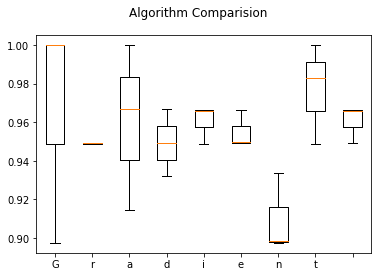

In [82]:
# Evaluate each model in turn

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
  cv_results = model_selection.cross_val_score(model, X_std, Y, cv = kfold, scoring = 'f1_weighted') #changed the scoring from roc_auc to f1_weighted
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))

  # Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show() 

Bias (Top 3) = AdaBoost,Logistic,GradientBoost


Variance Error (Top 3) = Naive_bayes,Bagging Classifier, Gradient Boost

# Stacking

**Stacking:** Take the Top 3 or 5 Performers and each Model
    
   * Soft_Voting = Weighted_Voting
    
   * Hard_Voting = UnWeighted_Voting

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
# stacked = VotingClassifier(estimators= [('AdaBoostLogistic', AdaB_LR,
#                                          'Gradient Boost', GB,
#                                          'NaiveBayes', NB)], voting = 'soft')

In [91]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')
DT = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
RF = RandomForestClassifier(criterion = 'entropy',n_estimators = 11, random_state = 0)
Bag = BaggingClassifier(n_estimators = 26, random_state = 0)
AdaB = AdaBoostClassifier(n_estimators = 10, random_state = 0)
Ada_LR = AdaBoostClassifier(base_estimator = LR, n_estimators = 6, random_state = 0)
GB = GradientBoostingClassifier(n_estimators = 60)
stacked = VotingClassifier(estimators = [('Logistic',LR),('Random_Forest',RF),('GradientBoost',GB)],voting = 'soft')

In [92]:
models = []
models.append(('Logistic',LR))
models.append(('Naive_Bayes',NB))
models.append(('KNeighborsClassifier',KNN))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('BaggingClassifier',Bag))
models.append(('AdaBoostClassifier',AdaB))
models.append(('AdaBoostClassifier_LogisticRegression',Ada_LR))
models.append(('GradientBoostingClassifier',GB))
models.append(('VotingClassifier',stacked))

Logistic: 0.965819 (0.003505)
Naive_Bayes: 0.949093 (0.000000)
KNeighborsClassifier: 0.960382 (0.001862)
DecisionTreeClassifier: 0.949320 (0.000303)
RandomForestClassifier: 0.960487 (0.000100)
BaggingClassifier: 0.955157 (0.000095)
AdaBoostClassifier: 0.909871 (0.000425)
AdaBoostClassifier_LogisticRegression: 0.977268 (0.000681)
GradientBoostingClassifier: 0.960541 (0.000098)
VotingClassifier: 0.977589 (0.000095)


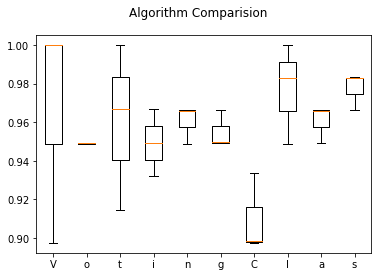

In [93]:
# Evaluate each Model in turn

results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X_std,Y, cv = kfold, scoring = 'f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, np.mean(cv_results), np.var(cv_results, ddof = 1)))
    

    
# Boxplot Algorithm Comparision

fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name)
plt.show()

**Stacked Model has Yielded us the best results. we go the Least Bias Error and a very Low Variance Error**

#**Machine Learning Steps:**

1. Load the data
2. Explore the data, try to understand the relationship between dependent and independent variables.
3. Data Cleaning / Feature Selection:
  * Clean the data (if neccesary look for Nan values or drop NA or median imputation or KNN imputation as required)
  * Statistical Tests: Apply the appropriate test based on data. Levene, Two-Sample T-Test, ANOVA, Two-sample proportion test, or Chi-Square Test Tip: Start by testing the signifance of the least correalated data. If that passes the p-value test that means by defaults all of others are significant. If it not, then go the least second correlated feature and test the signifance. Once a feature passes any other variable which has higher correlation will automatically pass the test.

4. Define X_final and Y. Include all significant feature in X_final
  * For Classification Model: Scale the data after defining X, "sc.fit_transform(X_Final)". NOT REQUIRED FOR REGRESSION

5. Start with SIMPLE Model such as (Linear Regression or Logistic Regression) by using k-fold cross validation loop
  * Rule of Thumb for K-Fold:
    * Data points: 300 (k-fold = 3), 400 - 500 (k-fold = 5), 1000 (k-fold = 5 -7), 5000 (k-fold = 10 - 15), as data points increase gradually increase the fold

6. Validate the linear model based on metrics: (Ex: we are k-fold 5)
  * Regression: RMSE score (Smaller the score the better)
    * Bias Error: Average of RMSE is Bias Error. Ex: We would get 5 RMSE scores for 5-fold cv, we take average of these score and that is the bias error.
    * Variance Error: Variance of RMSE scores is variance Error
  * Binary (1/0) Classification Model: AUC Score (Larger the score the better)
    * Bias Error: 1 - (Average AUC Scores). Ex: 5-fold cv we get 5 AUC scores, 1 - (average of 5 scores) = Bias Error of the model
    * Variance Error: Variance of AUC Scores is variance error
  * Multi-Class Classification: Weighted F-1 Score (Larger the score the better)
    * Bias Error: 1 - (Average Weighted F-1 Scores). Ex: 5-fold cv we get 5 Weighted F-1 Scores, 1 - (average of 5 scores) = Bias Error of the model
    * Variance Error: Variance of Weighted F-1 Scores is variance error

7. Next, start with model which we input hyperparameters
  * GridSeachCV for find hyperparameters when you want to consider BIAS error
  
        **OR**

  * Run a loop **(RECOMMENDED)** to find the best hyperparameters, this method is recommened because GridSearchCV only takes BIAS error into account and not variance error. Ex: We are trying to figure out the best hyperparameters for KNN run a loop and print and variance to find the which combination of hyperparameters gives the least bias and variance error: 

  Hyperparameters we look for:

  * KNN: n_neighbors
  * Decision Tree: max_depth (arange(1,50, it also depends on data size), criterion  = [gini or entropy]
  * Ensemble Models: n_estimators (arange(1,50 or 100)